IDENTIFICANDO REMOVENDO OUTLIERS

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib as plt 
plt.rc('figure',figsize=(14,6))

In [4]:
dados = pd.read_csv('aluguel_residencial_2.csv',sep=';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,Apartamento
...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,Apartamento


<AxesSubplot: >

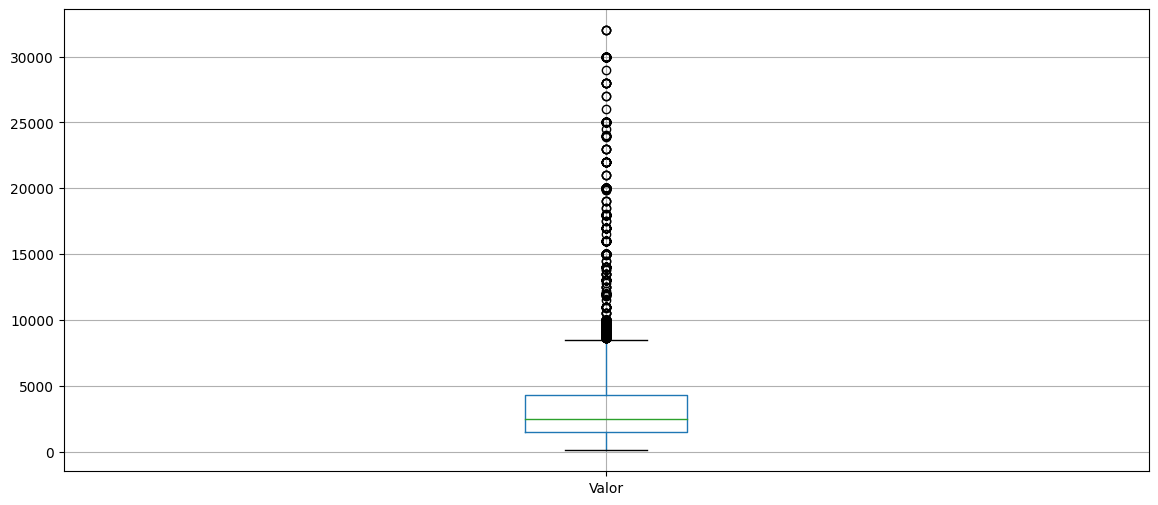

In [5]:
dados.boxplot(['Valor'])

In [7]:
dados[dados['Valor']>5000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Tipo Agregado
11,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,Apartamento
15,Apartamento,Copacabana,3,0,0,180,5500.0,1780.0,420.0,Apartamento
31,Apartamento,Barra da Tijuca,4,3,3,153,6500.0,2300.0,434.0,Apartamento
35,Apartamento,Botafogo,3,1,1,108,5950.0,1405.0,289.0,Apartamento
39,Apartamento,Ipanema,3,2,1,150,8000.0,2400.0,0.0,Apartamento
...,...,...,...,...,...,...,...,...,...,...
18779,Casa de Condomínio,Barra da Tijuca,4,3,2,250,7500.0,1300.0,680.0,Casa
18780,Casa de Condomínio,Barra da Tijuca,4,3,4,460,12000.0,1000.0,1200.0,Casa
18781,Casa de Condomínio,Barra da Tijuca,5,2,5,554,20000.0,1892.0,1743.0,Casa
18783,Casa de Condomínio,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,0.0,Casa


In [8]:
valor = dados['Valor']

valor

0         800.0
1         800.0
2        1300.0
3        1500.0
4        1500.0
          ...  
19826     400.0
19827     900.0
19828    1100.0
19829    1500.0
19830     800.0
Name: Valor, Length: 19831, dtype: float64

In [11]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [13]:
limite_inferior

-2700.0

In [14]:
limite_superior

8500.0

In [12]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

In [15]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,Apartamento
...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,Apartamento


array([[<AxesSubplot: title={'center': 'Valor'}>]], dtype=object)

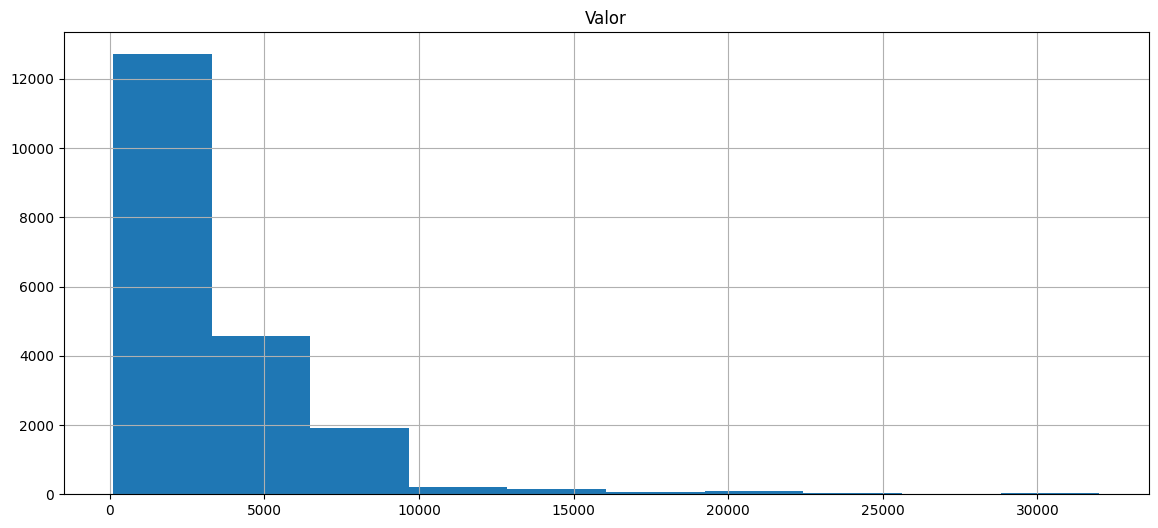

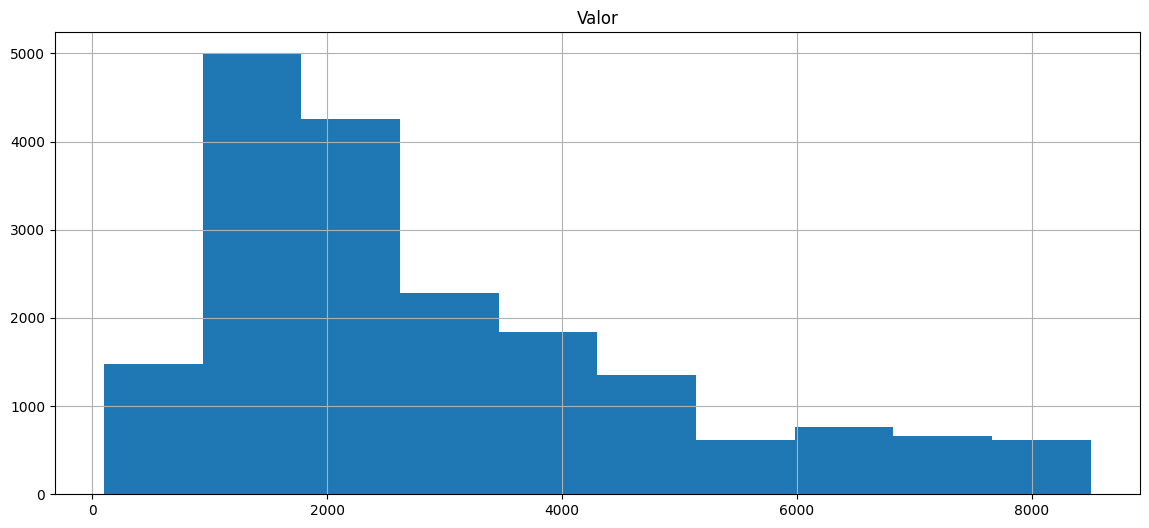

In [16]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])